In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-modelling/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/churn-modelling/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis= 1  , inplace = True )

In [7]:
num_col = df.select_dtypes(exclude = 'O').columns.tolist()
num_col

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [8]:
cat_col = df.select_dtypes(include = 'O').columns.tolist()
cat_col

['Geography', 'Gender']

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


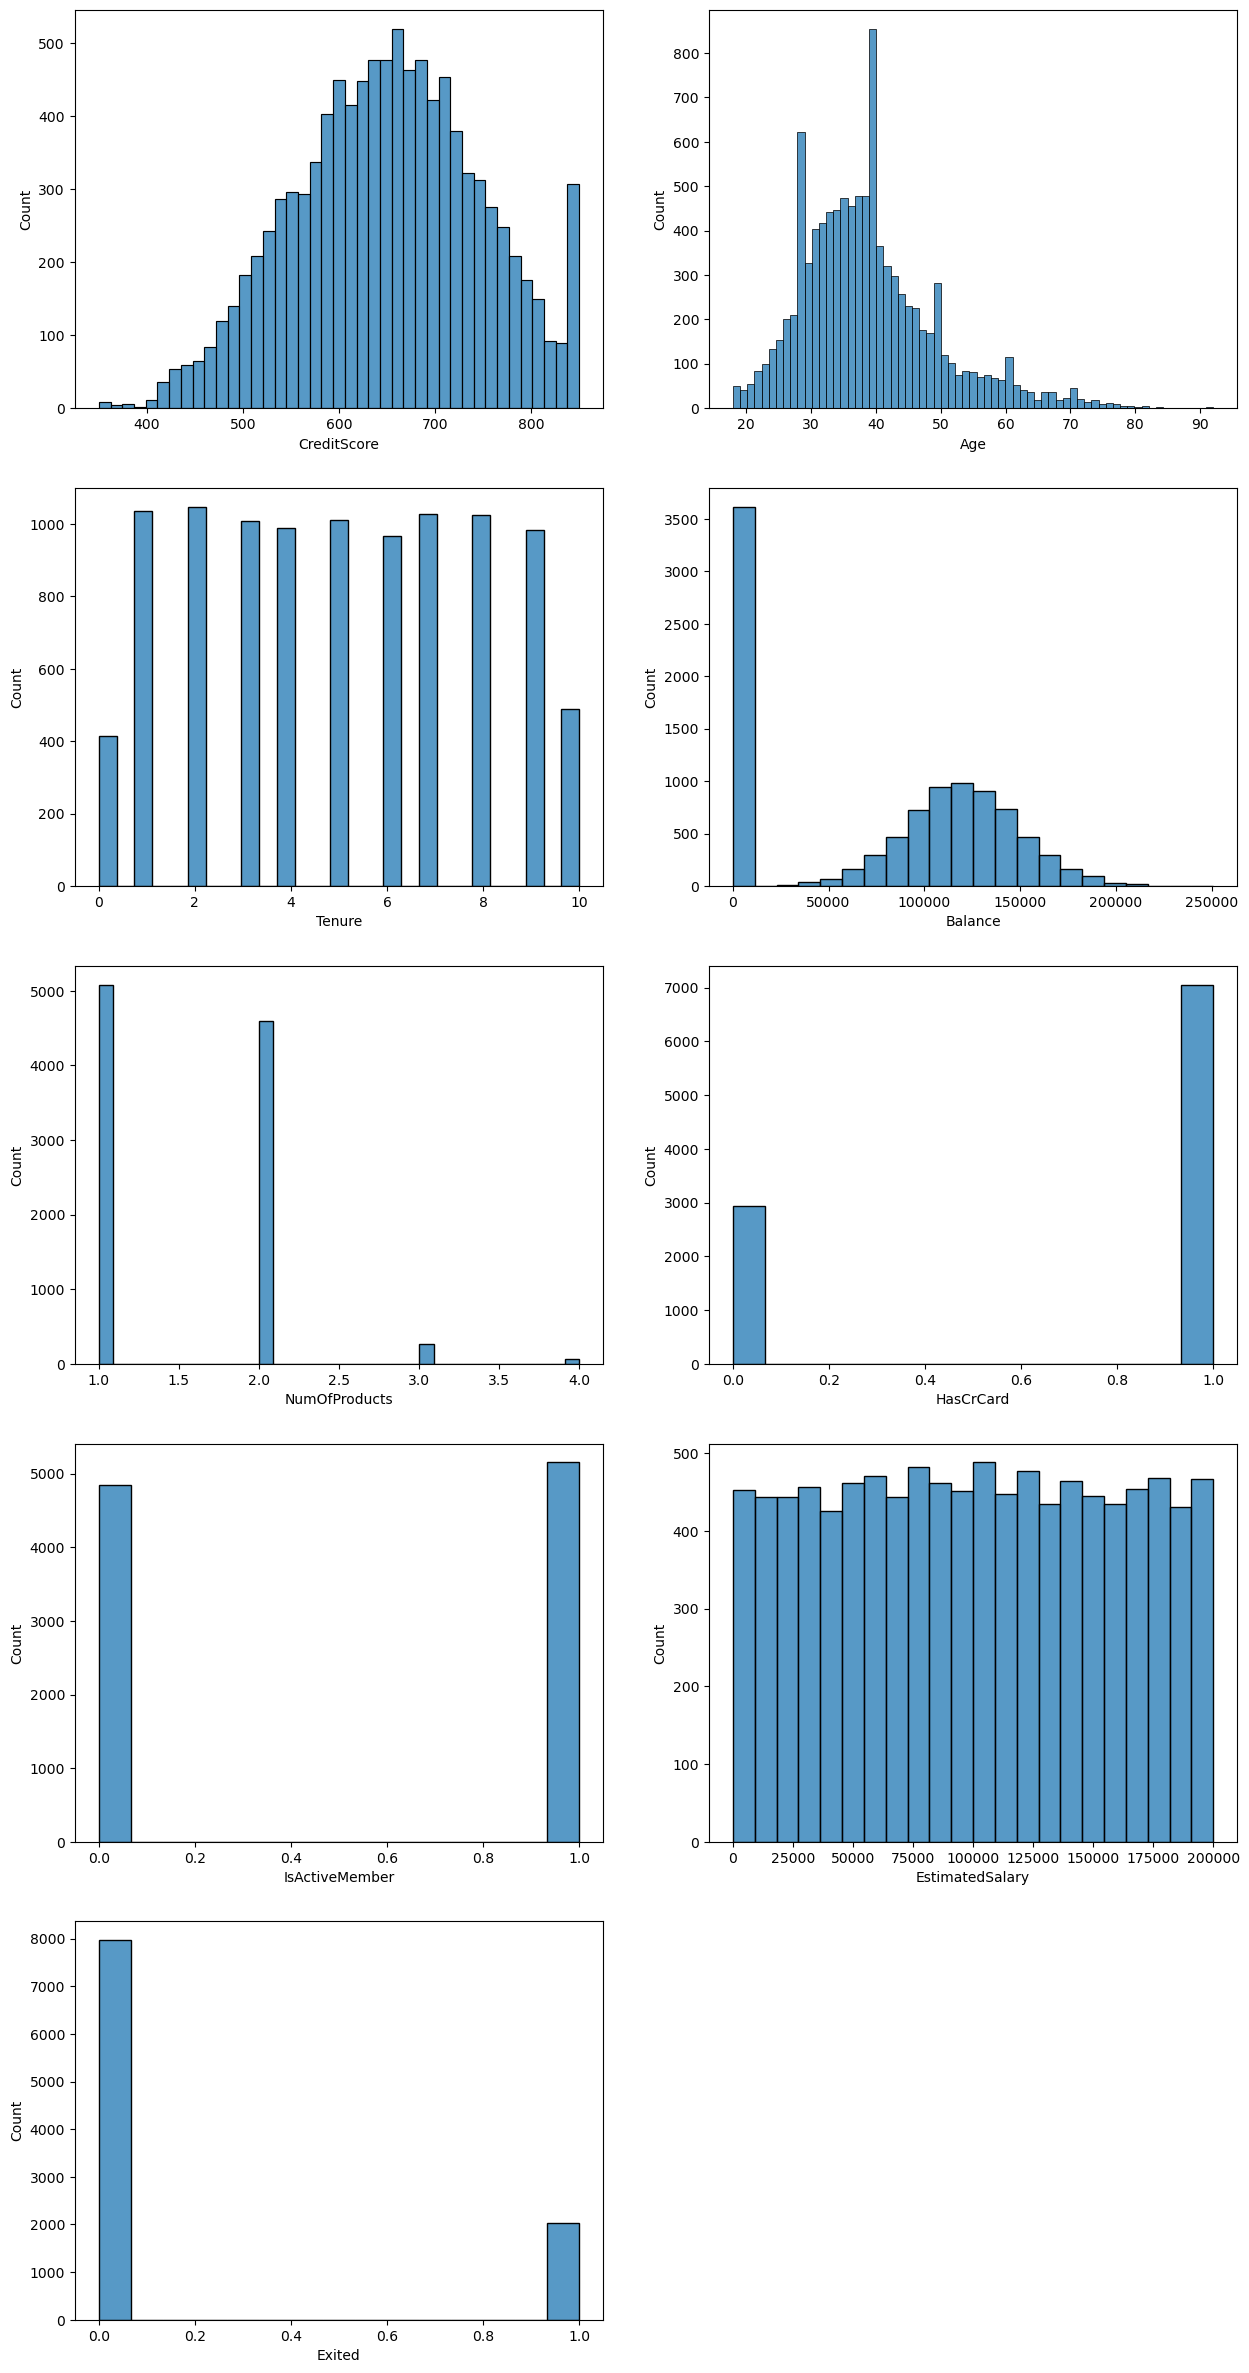

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize = (15 , 30))
for i , col in enumerate (num_col  ,1) :
    plt.subplot((len(num_col)//2+1) , 2 , i )
    sns.histplot(data = df , x = col)

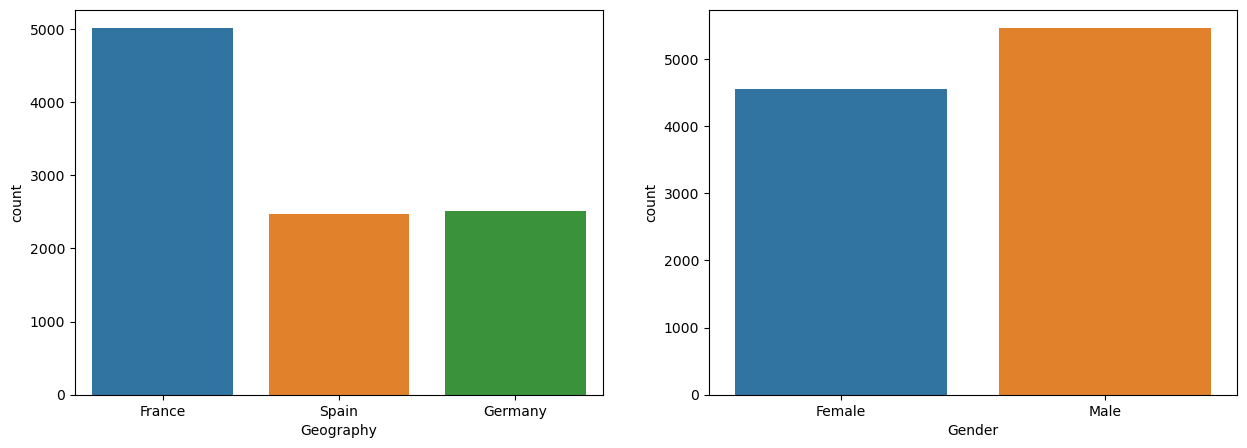

In [10]:
plt.figure(figsize = (15 , 5))
for i , col in enumerate (cat_col  ,1) :
    plt.subplot(1 , 2 , i )
    sns.countplot(data = df , x = col)

<Axes: xlabel='Age', ylabel='Count'>

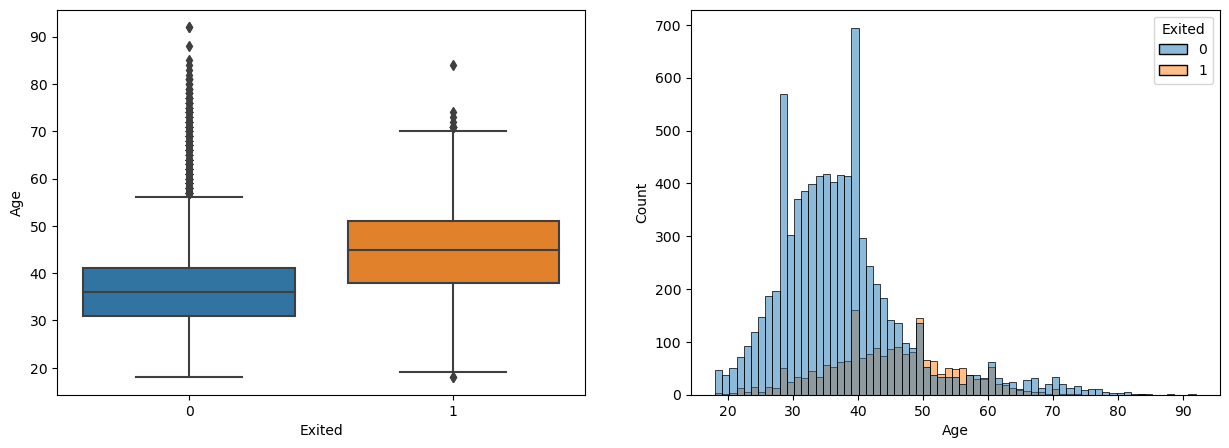

In [11]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Exited", y = "Age", data = df, ax = ax[0])
sns.histplot(df, x = "Age", hue = "Exited", ax = ax[1])

<Axes: xlabel='Balance', ylabel='Count'>

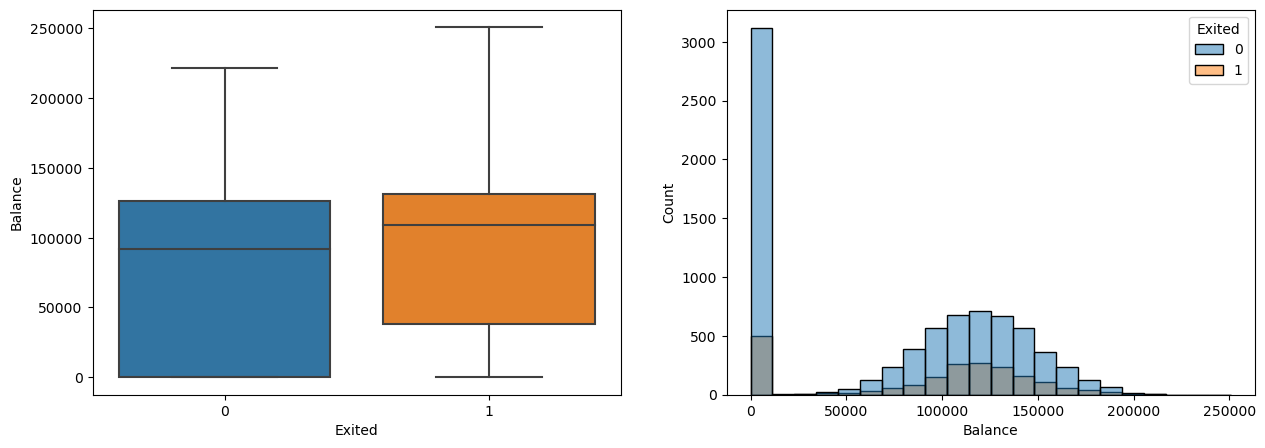

In [12]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Exited", y = "Balance", data = df, ax = ax[0])
sns.histplot(df, x = "Balance", hue = "Exited", ax = ax[1])

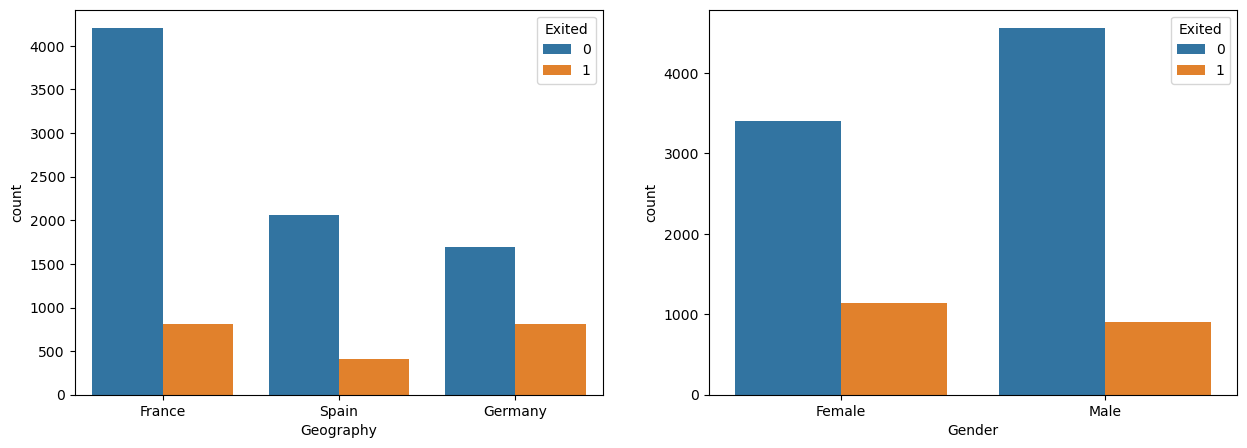

In [13]:
plt.figure(figsize = (15 , 5))
for i , col in enumerate (cat_col  ,1) :
    plt.subplot(1 , 2 , i )
    sns.countplot(data = df , x = col , hue = 'Exited')

/tmp/ipykernel_32/3831160966.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() , cmap = 'Blues')


<Axes: >

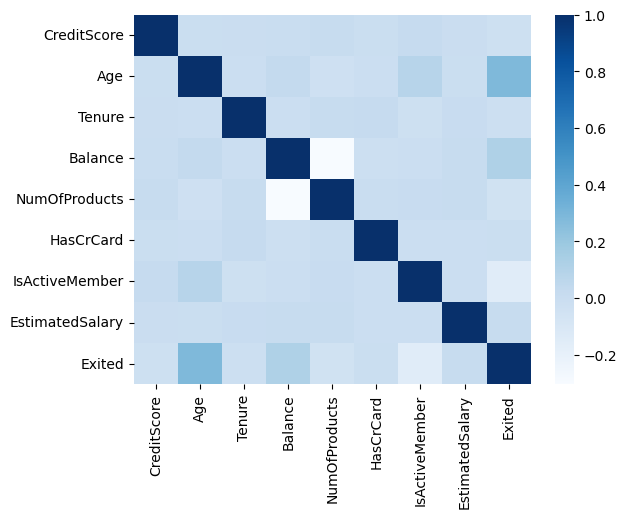

In [14]:
sns.heatmap(df.corr() , cmap = 'Blues')

In [15]:
X = df.drop('Exited'  , axis =1 )
y = df['Exited']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42 ,stratify = y)

In [17]:
y_train.value_counts(normalize = True )

0    0.796269
1    0.203731
Name: Exited, dtype: float64

In [18]:
y_test.value_counts(normalize = True )

0    0.796364
1    0.203636
Name: Exited, dtype: float64

In [19]:
num_cols = X_train.select_dtypes(exclude = 'O').columns.tolist()
num_cols

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [20]:
cat_cols = X_train.select_dtypes(include = 'O').columns.tolist()
cat_cols

['Geography', 'Gender']

In [23]:
!pip install datasist

In [24]:
from datasist.structdata import detect_outliers 

In [25]:
idx = detect_outliers(X_train , 0 , ['Age'])
out = X_train.loc[idx]
X_train = X_train.drop(idx  , axis=0)
y_train = y_train.drop(idx  , axis=0)

In [26]:
X_train.shape

(6446, 10)

In [27]:
y_train.shape

(6446,)

<Axes: xlabel='Age'>

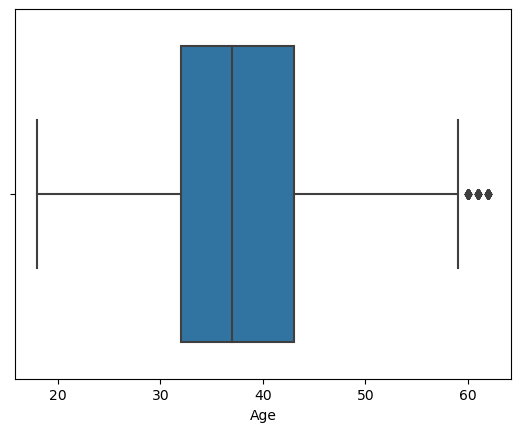

In [28]:
sns.boxplot(data = X_train , x = 'Age')

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
enc = OneHotEncoder(handle_unknown='ignore')
sc = StandardScaler()

ct = ColumnTransformer(
    [
        ('encoding' , enc , cat_cols ) ,
        ('scaling' , sc , num_cols)
    ]
)

In [30]:
ct.fit(X_train)
x_train = ct.transform(X_train)
x_test = ct.transform(X_test)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression(random_state=0)
lr.fit(x_train , y_train)
y_pred = lr.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      2628
           1       0.57      0.33      0.42       672

    accuracy                           0.81      3300
   macro avg       0.71      0.63      0.65      3300
weighted avg       0.79      0.81      0.79      3300



In [34]:
lr2 = LogisticRegression(random_state=0 , class_weight = 'balanced')
lr2.fit(x_train , y_train)
y_pred = lr2.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80      2628
           1       0.40      0.75      0.52       672

    accuracy                           0.72      3300
   macro avg       0.66      0.73      0.66      3300
weighted avg       0.81      0.72      0.74      3300



In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train , y_train)
y_pred = dt.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      2628
           1       0.48      0.52      0.50       672

    accuracy                           0.79      3300
   macro avg       0.68      0.69      0.68      3300
weighted avg       0.79      0.79      0.79      3300



In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train , y_train)
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.91      2628
           1       0.73      0.47      0.57       672

    accuracy                           0.86      3300
   macro avg       0.80      0.71      0.74      3300
weighted avg       0.85      0.86      0.84      3300



In [37]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(x_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 1320), (1, 1320)]


In [38]:
lr.fit(X_resampled , y_resampled)
y_pred = dt.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      2628
           1       0.48      0.52      0.50       672

    accuracy                           0.79      3300
   macro avg       0.68      0.69      0.68      3300
weighted avg       0.79      0.79      0.79      3300



In [39]:
dt.fit(X_resampled , y_resampled)
y_pred = dt.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.68      0.78      2628
           1       0.37      0.72      0.49       672

    accuracy                           0.69      3300
   macro avg       0.64      0.70      0.63      3300
weighted avg       0.80      0.69      0.72      3300



In [40]:
rf.fit(X_resampled , y_resampled)
y_pred = dt.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.68      0.78      2628
           1       0.37      0.72      0.49       672

    accuracy                           0.69      3300
   macro avg       0.64      0.70      0.63      3300
weighted avg       0.80      0.69      0.72      3300



In [42]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(x_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 5126), (1, 5126)]


In [43]:
lr.fit(X_resampled , y_resampled)
y_pred = dt.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.68      0.78      2628
           1       0.37      0.72      0.49       672

    accuracy                           0.69      3300
   macro avg       0.64      0.70      0.63      3300
weighted avg       0.80      0.69      0.72      3300



In [44]:
dt.fit(X_resampled , y_resampled)
y_pred = dt.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      2628
           1       0.45      0.55      0.49       672

    accuracy                           0.77      3300
   macro avg       0.66      0.69      0.67      3300
weighted avg       0.79      0.77      0.78      3300



In [45]:
rf.fit(X_resampled , y_resampled)
y_pred = dt.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      2628
           1       0.45      0.55      0.49       672

    accuracy                           0.77      3300
   macro avg       0.66      0.69      0.67      3300
weighted avg       0.79      0.77      0.78      3300



In [46]:
from imblearn.pipeline import Pipeline
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler()
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
x_pipe, y_pipe = pipeline.fit_resample(x_train, y_train)
Counter(y_pipe)

Counter({0: 2563, 1: 2563})

In [48]:
lr.fit(x_pipe , y_pipe)
y_pred = lr.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80      2628
           1       0.40      0.75      0.52       672

    accuracy                           0.72      3300
   macro avg       0.66      0.73      0.66      3300
weighted avg       0.81      0.72      0.75      3300



In [47]:
rf.fit(x_pipe , y_pipe)
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89      2628
           1       0.56      0.68      0.61       672

    accuracy                           0.83      3300
   macro avg       0.74      0.77      0.75      3300
weighted avg       0.84      0.83      0.83      3300



In [49]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier()
brf.fit(x_train, y_train) 
y_pred = brf.predict(x_test)
print(classification_report(y_pred, y_test))

/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.para

              precision    recall  f1-score   support

           0       0.77      0.93      0.85      2171
           1       0.79      0.47      0.59      1129

    accuracy                           0.78      3300
   macro avg       0.78      0.70      0.72      3300
weighted avg       0.78      0.78      0.76      3300



/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(


In [51]:
from sklearn.metrics import roc_auc_score
threshold_value = 0.2 
roc_score=0
predicted_proba = lr.predict_proba(x_test) #probability of prediction
predicted_proba

array([[0.42506019, 0.57493981],
       [0.68034414, 0.31965586],
       [0.78221777, 0.21778223],
       ...,
       [0.34887066, 0.65112934],
       [0.84476687, 0.15523313],
       [0.77781757, 0.22218243]])

In [52]:
predicted_proba [:,1] >= 0.2

array([ True,  True,  True, ...,  True, False,  True])

In [53]:
while threshold_value <=0.8: #continue to check best threshold upto probability 0.8
    temp_thresh = threshold_value
    predicted = (predicted_proba [:,1] >= temp_thresh).astype('int') #change the class boundary for prediction
    print('Threshold',temp_thresh,'--',roc_auc_score(y_test, predicted))
    if roc_score<roc_auc_score(y_test, predicted): #store the threshold for best classification
        roc_score = roc_auc_score(y_test, predicted)
        thrsh_score = threshold_value
    threshold_value = threshold_value + 0.05
print('---Optimum Threshold ---',thrsh_score,'--ROC--',roc_score)

Threshold 0.2 -- 0.5915586268754077
Threshold 0.25 -- 0.6314042454881497
Threshold 0.3 -- 0.6633439334637965
Threshold 0.35 -- 0.6855634377038486
Threshold 0.39999999999999997 -- 0.7063797836486193
Threshold 0.44999999999999996 -- 0.7233909545553381
Threshold 0.49999999999999994 -- 0.7324792074363992
Threshold 0.5499999999999999 -- 0.726550608828006
Threshold 0.6 -- 0.7209175907806045
Threshold 0.65 -- 0.7047829691237225
Threshold 0.7000000000000001 -- 0.68327014024788
Threshold 0.7500000000000001 -- 0.6621174440095674
---Optimum Threshold --- 0.49999999999999994 --ROC-- 0.7324792074363992


In [54]:
from sklearn.metrics import roc_auc_score
threshold_value = 0.2 
roc_score=0
predicted_proba = lr2.predict_proba(x_test) #probability of prediction
while threshold_value <=0.8: #continue to check best threshold upto probability 0.8
    temp_thresh = threshold_value
    predicted = (predicted_proba [:,1] >= temp_thresh).astype('int') #change the class boundary for prediction
    print('Threshold',temp_thresh,'--',roc_auc_score(y_test, predicted))
    if roc_score<roc_auc_score(y_test, predicted): #store the threshold for best classification
        roc_score = roc_auc_score(y_test, predicted)
        thrsh_score = threshold_value
    threshold_value = threshold_value + 0.05
print('---Optimum Threshold ---',thrsh_score,'--ROC--',roc_score)

Threshold 0.2 -- 0.5842948195259838
Threshold 0.25 -- 0.6249014731463362
Threshold 0.3 -- 0.6590223418134377
Threshold 0.35 -- 0.6826246194824962
Threshold 0.39999999999999997 -- 0.7083027560339203
Threshold 0.44999999999999996 -- 0.7203468145248968
Threshold 0.49999999999999994 -- 0.7301961024135682
Threshold 0.5499999999999999 -- 0.7291292944118287
Threshold 0.6 -- 0.720554060665362
Threshold 0.65 -- 0.7042461676451403
Threshold 0.7000000000000001 -- 0.68088171341596
Threshold 0.7500000000000001 -- 0.6580336757990868
---Optimum Threshold --- 0.49999999999999994 --ROC-- 0.7301961024135682


In [55]:
from sklearn.metrics import roc_auc_score
threshold_value = 0.2 
roc_score=0
predicted_proba = rf.predict_proba(x_test) #probability of prediction
while threshold_value <=0.8: #continue to check best threshold upto probability 0.8
    temp_thresh = threshold_value
    predicted = (predicted_proba [:,1] >= temp_thresh).astype('int') #change the class boundary for prediction
    print('Threshold',temp_thresh,'--',roc_auc_score(y_test, predicted))
    if roc_score<roc_auc_score(y_test, predicted): #store the threshold for best classification
        roc_score = roc_auc_score(y_test, predicted)
        thrsh_score = threshold_value
    threshold_value = threshold_value + 0.05
print('---Optimum Threshold ---',thrsh_score,'--ROC--',roc_score)

Threshold 0.2 -- 0.700916639486845
Threshold 0.25 -- 0.7313682322243966
Threshold 0.3 -- 0.7523918243096326
Threshold 0.35 -- 0.7726917536420961
Threshold 0.39999999999999997 -- 0.7706226897151556
Threshold 0.44999999999999996 -- 0.7692467112415742
Threshold 0.49999999999999994 -- 0.769219531419874
Threshold 0.5499999999999999 -- 0.7617892476625352
Threshold 0.6 -- 0.7499660252228745
Threshold 0.65 -- 0.7384383833442053
Threshold 0.7000000000000001 -- 0.709451103500761
Threshold 0.7500000000000001 -- 0.6863822298325724
---Optimum Threshold --- 0.35 --ROC-- 0.7726917536420961
